### This document will act as a repository of operational information for SG Funds Group operations as of January 2019
SG_Discovery

#### there are currently four operating programs under the CTA:
1. Contrarian S&P Program
2. Contrarian S&P Long/Flat Program
3. Multi-Strategy Futures Program
4. Global Contrarian Stock Index Program

#### The following five peices of software have been disclosed:
1. QuickFix FIX : based order submission and data. http://www.quickfixengine.org/
      1. Trading platform to handle all trading by daily basis.
      2. Transferring the trading data to back office and Data system.
      3. Generate the trading strategy.
      4. Rolling execution.
      5. Catch up execution.
      6. Trading Allocation.
2. RiskMonitor : more detail required.___**
3. TaskMontior : more detail required.___** likely an infrastructure monitoring tool.
4. DiaPro : more detail required.___**
      1. Bank office system to handle all works related trading, client, brokers.
      2. Update the trading data into individual client account.
      3. Calculate the daily / monthly / yearly returns for the clients' account.
      4. Reconcile the execution records by D/M/Y basis.
      5. AUM adjustment.
      6. Fees calculation.
      7. New open, close account + the account info changing update.
      8. Generate the trading allocation and export to QF, send AR to Newedge.
      9. Generate the trading positiontable update
5. Billing System : more detail required.___**

6. Prime Broker (SocGen/NewEdge):
      1. trading confirmation and the service of system transmition;
      2. trading give up to the other clearing brokers due to PAM Allocation report. __** Why giveups and not multi-broker?
      3. Service for tracking error allocation with each clearing broker.

#### Other Operational Details
1. seven production instances (Virtual Servers/machines)

2. four DB instances hosting MySQL (Database price and other model input warehouse likely

3. two communication instances and (likely for messaging and sending FIX orders)

4. one manager instance that automatically back-up production AMIs (Amazon Machine Images) on a daily basis.(Meta Process Server, likely manages servers and recovery process)

5. They are a mixture of windows and Linux. (often some off the shaft is only available in windows necessitating windows servers in the mix software)

6. mirrored in the CA availability zone for disaster recovery. (NFA required a disaster recovery plan)

7. Regarding back-ups, systems are uploaded to S3 (Amazon Simple Storage Service) and we can pull the projects from there to redeploy. (NFA required a disaster recovery plan)

8. Developemnt currently in Java 7/8. JavaFX. 

9. Possibly some form of source control repository for: 
    1. QuickFix FIX : based order submission and data.
    2. RiskMonitor : more detail required.___**
    3. TaskMontior : more detail required.___** likely an infrastructure monitoring tool.
    4. DiaPro : more detail required.___**



### Notes on PAM existing "proprietary platform"
1. Data management and interfacing system component.
2. Data transformation or feature engineering layer.
3. Signal Generation layer (1, 0, -1).
there seems to be a disconnect between the current PAM trading style and the data management goals contemplated but possibly not implemented.

### Screen shot of QuickFix System

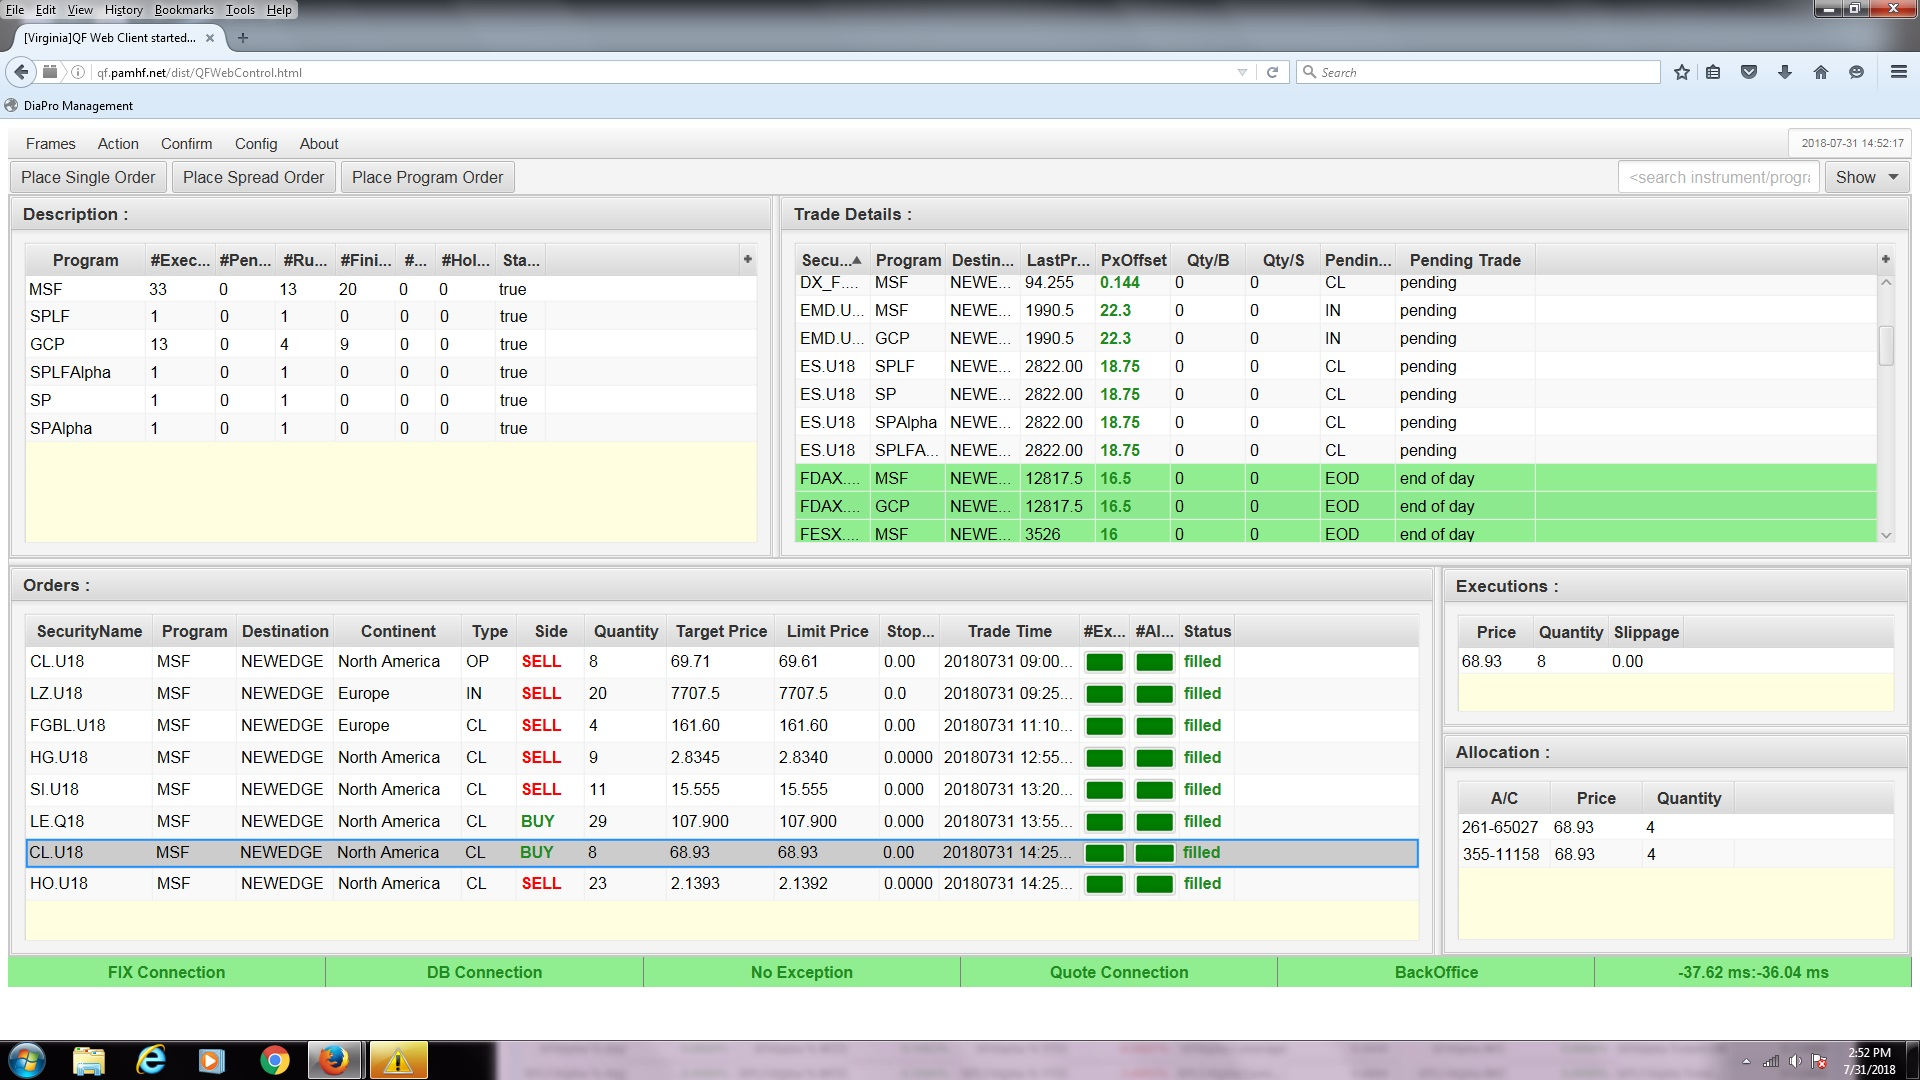

In [1]:
from IPython.display import Image
Image(".\Data\PAm_QF Trading system.jpg",width=2150, height=2157)

# C:\Python Notes\Jupyter notebooks\SG_Discovery\Data

### Signal types and Description:

Two input parameters chosen independently by the user govern how a given chart summarizes the known historical price data, allowing the user to vary the response of the chart to the magnitude and frequency of price changes, similar to parametric formulas in signal processing or control systems. Bollinger Bands consist of a N-period moving average (MA), an upper band at K times an N-period standard deviation above the moving average (MA + Kσ), and a lower band at K times an N-period standard deviation below the moving average (MA − Kσ). The chart thus expresses arbitrary choices or assumptions of the user, and is not strictly about the price data alone.

Typical values for N and K are 20 and 2, respectively

source: https://en.wikipedia.org/wiki/Bollinger_Bands
source: https://commodity.com/technical-analysis/bollinger-bands/


1. S1: [S1]  bo

Parameters: EntryTFandExitTF, allowreverse

#### Takes long position if close price > highest price in the entry time frame and short if close < lowest price.

#### Exits long position if close price < lowest price in the exit time frame and exits short position if close price > highest price in exit time frame.

#### When allowreverse = true, it will reverse only if the breakout satisfies both entry and exit price.


#### Example of S1(Signal #1)

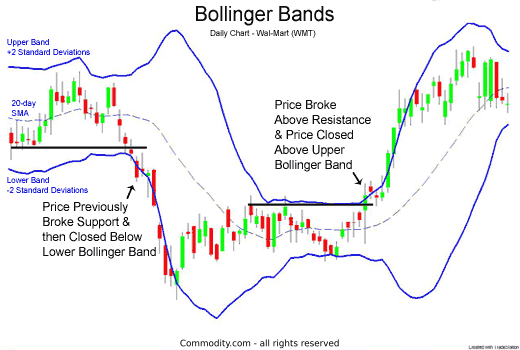

In [2]:
Image(".\Data\BollingerBandsWMTbreakouts.gif",width=2150, height=2157,embed=True)

___________________________________________________

2. [S2]  BoTi_AtrBuyOnly

Parameters: EntryTF, ExitTF, k
####  long is taken when price > highest price + k*atr in the entry time frame and exits when price < lowest price in exit time frame.

same entry type as S1 but with an addition Average True Range entry filter.

#    _______________________________________________________________________

3. [S3]  boti_atrsellonly

Parameters: EntryTF, ExitTF, k

##### A modification of “bo” where shorts taken when price < lowest price - k*atr in the entry time frame and exits when price > highest price in exit time frame.

* a short only version of S2

# ______________________

4. [S4]  DnFDnM

Parameters: HoldingFrame

#### If day = Monday and last three trading bars are down, then enter and hold for specified number of bars.

* day of the week plus serial down day siganl with time based exit.

# ______________________

5. [S5]  Fv

Parameters: allowreverse, ma_len, nsd

#### Takes long position if close price < moving average over last ma_len days – nsd*sd and takes short position short position if close price > moving average over last ma_len days + nsd*sd.

#### Exits long position if close price >= moving average, exits short position if close price <= moving average. When allowreverse = true, will reverse only if it also satisfies the entry conditions.

A mean reversion entry signal based on the bounds of the standard price dispersion.



#### Example of S5 (Signal #5)

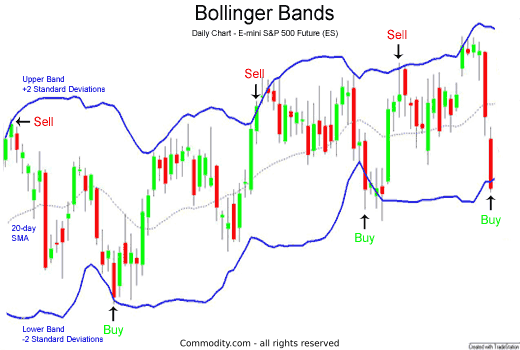

In [3]:
Image(".\Data\BollingerBandsESbuysell.gif",width=2150, height=2157,embed=True)

# _______________

6. [S6]  Fv_alpha

Parameters: ma_len, nsd

#### A modification of Fv strategy except moving average is replaced with a linear regression over the look back period and close price is matched against linear regression value ± nsd*sd. Exit conditions also reflect a linear regression instead of moving average.

# ________________________

7. [S7]  fv_atr

Parameters: ma_len, n_atr, allowreverse

#### A modification of Fv strategy except standard deviation is replaced with sqrt(len)*n_atr*atr of look-back period. Exit conditions also use moving average and reversal reflect the modified entry condition as compared to standard deviation.

# _______________________

8. [S8]  fv_intradaybuyonly

Parameters: ma_len, nsd

####  A modification of the fv strategy except it enters intraday and always exits at close. When weekly, it exits at end of week.


# _______________________

9. [S9] fv_intradaysellonly

Parameters: ma_len, nsd

####  A modification of the fv strategy except it enters intraday and always exits at close. When weekly, it exits at end of week.


# _______________________

10. [S10] fv_ndloss_xma

Parameters: ma_len, nsd, ndloss, allowreverse

#### A modification of the fv strategy except ndloss is another entry condition where ndloss means close on “ndloss” days ago. 

#### A long position is taken when close price < close price on ndloss days ago < ma – nsd*sd.

#### A short position is taken when close price > close price on ndloss days ago > ma+nsd*sd.

#### When allowreverse = true, the same entry criterion has to be met, otherwise exit is still based on movng average over ma_len.

* another variation of mean reversion entry signal


# _______________________

11.[S11]  Fv_Tema

Parameters: tema_len, nsd, allowreverse

#### A modification of the fv strategy where exponential moving average is used in place of moving average


# _______________________

12.[S12]  fv_tema_ibuyonly

Parameters: tema_len, nsd, allowreverse

#### A modification of the fv intraday strategy where exponential moving average is used in place of moving average.




# _______________________

13.[S13]  fv_tema_isellonly

Parameters: tema_len, nsd, allowreverse

#### A modification of the fv intraday strategy where exponential moving average is used in place of moving average




# _______________________

14.[S14]  fv_tema_isellonly

Parameters: ma_len, nsd, fvn

#### A modification of fv strategy except it always holds for fvn trading bars.

* timed exit version of fv

# _______________________

15.[S15]  FvX

Parameters: ma_len, nsdEntry, nsdExit, allowreverse

#### A modification of fv strategy except exit conditions reflect moving average ± nsd*sd instead of purely moving average.
FvX waits more than regular FV e.g. if long, will exit when close >= ma + nsd*sd

# _______________________

16 .[S16]  FvX

Parameters: percent

#### Requires a “gap” to exist and price to be outside that gap:Take long position if lastLow*(1+percent) > lastHigh(1-percent) and open < lastLow and price >= lastLow*(1+percent)

#### Take short position if lastLow*(1+percent) <= lastHigh*(1-percent) and open > lastHigh and price <= lastHigh*(1-percent), Exits position at close of the bar.

* gap entry signal.


# _______________________

17 .[S17]  mastrategy

Parameters: ma_len, allowreverse

#### Takes long position when close price > moving average over ma_len days and takes short position when close price < moving average over ma_len days.

#### Take short position if lastLow*(1+percent) <= lastHigh*(1-percent) and open > lastHigh and price <= lastHigh*(1-percent), Exits position at close of the bar.




# _______________________

18 .[S18]  pierce

Parameters: percent, allowreverse

#### Takes long position when close price > moving average over ma_len days and takes short position when close price < moving average over ma_len days.

#### Take short position if lastLow*(1+percent) <= lastHigh*(1-percent) and open > lastHigh and price <= lastHigh*(1-percent), Exits position at close of the bar.

avgCurrentLowCurrentHigh = (low[n]+high[n])/2 


avgLastLowLastHigh = (low[n-1]+high[n-1])/2





# _______________________

19 .[S19]  pivot

Parameters: percent, allowreverse

#### If price >= average of high/low/close + high - low, all from previous bar, take a long position and exit at close.


# _______________________

20 .[S20]  Pivot_msl

#### A modification of pivot except it will necessarily hold at least one day and exit when price <= average of previous high/low/close 

# _______________________

21 .[S21] PivrBuyOnlyClose

#### A modification of pivot, where all data is from previous day, except it involves 
#### support = 2*average(high, low, close) – high, taking a long position if price <= support and exits at close


# _______________________

22 .[S22] PivrBuyOnlyOpen

#### A modification of PivrBuyOnlyClose except it holds overnight and exits at open when the exit condition is met, meaning it holds at least one day but potentially more.


# _______________________

23 .[S23] pivrsellonlyopen

#### A modification of PivrSellOnlyClose except it holds overnight and exits at open when the exit condition is met, meaning it holds at least one day but potentially more.

#### resistance = 2*average(high, low, close) – low, taking a short position if price >= resistance and holding overnight, exiting at open when the condition is met, meaning it holds at least over night but potentially more


# _______________________

24 .[S24] ru

Parameters = ma_len, r_len

#### Takes long position if close prices over look-back r_len are all up and takes a short position if close prices over r_len are all down.

### Exits long position when close <= moving average and exits short position when close >= moving average.

### Please note, ru in S&P program is reversed.



# _______________________

25 .[S25] ru_o

Parameters = ma_len, r_len
Modification of ru except it only exits at open.



# _______________________

26 .[S26]  smom

Parameters = sd_len, nsd, HoldingFrame

#### Takes long position if price >= yesterday’s close + nsd*sd and exits after ‘holding frame’ number of days on open.

it enters on Thursday it exit on Monday of the next week.





# _______________________

27 .[S27]  SmomMET

Parameters = sd_len, nsd

#### A modification of smom except exit criterion is when price < yesterday’s close + nsd*sd


# _______________________

28 .[S28]  SpDouble

#### For SP program, doubles the number of positions at end of day if the price moves against currently exposed position.

* appearent martingale logic!!


# _______________________

29 .[S29]  SpIntra

Parameters = atr_len, natr_bte, natr_btx, natr_ste, natr_stx

#### For SP program, acts as a profit lock-in mechanism. When position is long and price moves by natr_ste * atr, then activates by reducing long positions by 50% and will close position at end of day.

#### When position is short and price moves by natr_bte * atr, then activates by reducing short positions by 50% and will close position at end of day.


* Intraday profit taking logic.

# _______________________

30 .[S30]  sts

Parameters = enterdayoffset, entertime, exittime, holdingday, resource

#### STS is a strategy that creates a synthetic cumulative PL line that takes as its center a noteworthy fundamental or technical time, such as monthly unemployment numbers. By doing so, the idea is to find a potential trading signal if the summed historical price action has enough of price movement. Once identified, the parameters indicate the entry date, relative to the resource, the time of entry, the length of hold and the time of exit.

MSF_NEW row 17 – we look at the third Friday. Buy 3 days before that (on Tuesday at 15:00). Then, you sell on the upcoming Monday (at 9:35). We try this hypothetical trade for the last period (maybe 10 years). Giving more weight to the recent past. If this has enough of a positive P&L, we will activate the strategy for real on the coming third Friday. While we do not have all the details (e.g. what is “enough P&L”) – we understand this conceptually.



# _______________________

31 .[S31]  tenpct

Parameters = percent

#### If the last close price closes below a certain percentage threshold, then it takes a long position at open the following bar and exits at end of bar.

Threshold = lastActualClose * (1-percent)



# _______________________

32 .[S32]  tenpctm

Parameters = percent, r_len

#### A modification of tenpct except it holds at least r_len bars with all bars within r_len closing higher than the previous.

Threshold = lastActualClose * (1-percent)



# _______________________

33 .[S33]  tenpctn

Parameters = percent, holdingframe

#### A modification of tenpct except it holds for the number of bars specified by holdingframe.

Threshold = lastActualClose * (1-percent)



# _______________________

34 .[S34]  tpatrbuyonly

Parameters = n_atr

#### Takes a long position when price is below the last close – n_atr*atr and will hold for r_len = 3 i.e. when price closes up for three days in a row.



# _______________________

35 .[S35]  WeightLimit 

For SP Program, keeps the maximum exposure to 2.1 long and 0.7 short.

Decile filters:


# There appear to be 5-6 classes of strategies available in long, short or bidirectional.

# Addtionally there are a set of sizing "strategies".

# I would classify the 35 signals into the following groups:

1. Mean Reversion Signals
2. Breakout Signals
3. Trend Following Signals
4. Time Based holding Signals
5. Pivot Point based Siganls
6. Exit or Profit taking Signals.

